# 3D Scatter Plot

In [3]:
# 임포트 판다스

import pandas as pd
from pandas import DataFrame, Series

In [17]:


def make_dic(normal_variable):
    return {each:index for index, each in enumerate(sorted(set(normal_variable)))}
    

def make_index(normal_variable):
    """
    x의 값이 명목형 일때, 사전을 입력하여, 정수로 바꿔줌.
    """
    dic1 = make_dic(normal_variable)
    return [dic1[each] for each in normal_variable]



def graph_3d_scatter(x,y,z, **kwargs):
    """
    2020.4.11(토)
    
    x,y,z값을 입력하면 3D scatter 그래프 출력해줌
    
    parameters:
    ----------
    x : 명목형 데이터, 숫자
    y : 명목형 데이터, 숫자
    z : 리스트, 실수 or 정수값
    
    x,y,z 의 길이는 같아야 함 
    
    returns:
    -------
    ax
    
    """ 
    # 만약 입력 데이터가 nominal scale 이면,
    if kwargs.get('nominalx',False):
        xticklabels = make_dic(x).keys()
        x2=make_index(x)
        #print(xticklabels)
    else:
        x2=x
        
    if kwargs.get('nominaly',False):
        yticklabels = make_dic(y).keys()
        y2=make_index(y)
        #print(yticklabels)
    else:
        y2=y
        
    fig = plt.figure(figsize=kwargs.get('figsize',(8,6)), facecolor = kwargs.get('facecolor',"#000000"),  )
    ax  = fig.add_subplot(111, projection='3d',facecolor = kwargs.get('facecolor',"#000000"), )

    # camp 사용하는 부분
    cmap1      = matplotlib.cm.get_cmap(kwargs.get('cmap',"viridis"))
    normalize  = matplotlib.colors.Normalize(vmin=np.min(z), vmax=np.max(z))
    colors     = [cmap1( normalize(each) ) for each in z]
    print(colors)
    i=0
    max_y = max(y2)
    for ix,iy,iz in tuple(zip(x2,y2,z)):
        #ax.scatter(ix, iy, iz, color=kwargs.get('c','#ff0000'), s= kwargs.get('s',20))
        ax.scatter(ix, iy, iz, s= kwargs.get('s',20),  color=colors[i])
        #ax.scatter(ix, iy, -0.1,  s= kwargs.get('s',20)/3,  color='#555555', marker='o')
        #ax.scatter(ix, max_y+0.1 , iz,  s= kwargs.get('s',20)/3,  color='#555555', marker='o')
        i+=1
    
    #ax.scatter(np.array(x2), np.array(y2), np.array(z),  c=colors)
        
    if kwargs.get('nominalx',False):
        ax.set_xticklabels(xticklabels, rotation=0, fontsize='small')
    if kwargs.get('nominaly',False):
        ax.set_yticklabels(yticklabels, rotation=0, fontsize='small')
   
    from matplotlib.ticker import FixedLocator
    
    xp = range(len(set(x2))+1)
    yp = range(len(set(y2))+1)
    print(xp,yp)
    
    major_locatorx   = FixedLocator(xp )    # 메이저 로케이터 표시함 
    ax.xaxis.set_major_locator(major_locatorx)
    major_locatory   = FixedLocator(yp )    # 메이저 로케이터 표시함 
    ax.yaxis.set_major_locator(major_locatory)

    
    ax.set_xlabel(kwargs.get('xlabel','X Label'))
    ax.set_ylabel(kwargs.get('ylabel','Y Label'))
    ax.set_zlabel(kwargs.get('zlabel','Z label'))
    
    ax.tick_params(axis     ='both', 
                which     ='major', 
                labelsize = 6,     
                labelcolor="#ffffff",
                bottom=False, top=False, left=False,  right=True,
                width =1, 
                length=5, 
                direction= 'out', 
                color="#222222")
    
    '''
    xmin = min(x)
    xmax = max(x)
    ymin = min(y)
    ymax = max(y)
    '''
    #ax.set_xlim(xmin,xmax)
    #ax.set_ylim(ymin,ymax)
    #ax.minorticks_off()
    
    #4-tuple of floats rect = [left, bottom, width, height]
    cax = plt.axes([0.1, 0.2, 0.04, 0.3])
    cax.set_title(kwargs.get('zlabel','color bar'),fontsize= 10)
    cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap1, norm=normalize)

    cax.tick_params(axis     ='both', 
                which     ='major', 
                labelsize = 10,     
                labelcolor="#ffffff",
                bottom=False, top=False, left=False,  right=True,
                width=1, 
                length=5, 
                direction= 'out', 
                color="#222222")

    
    plt.show()
    return ax

## 엑셀파일 불러오기 

In [18]:
df = pd.read_excel('Documents2.xlsx')

In [19]:
df.head(3)

,번호,연구분야대분류,연구분야중분류,기준년도,사업부처,연구개발단계,사업화형태,연구수행주체,정부투자연구비합계,지원과제수,사업화성과건수합계,고용창출인원합계,당해년도매출액합계
0,1,EA,EA01,2013,과학기술정보통신부,1기초연구,NaN,기타,1.010000e+08,1,0,0.0,0.0
1,2,EA,EA01,2013,과학기술정보통신부,1기초연구,NaN,대학,4.761042e+09,27,0,0.0,0.0
2,3,EA,EA01,2013,과학기술정보통신부,1기초연구,NaN,출연연구소,6.961235e+10,30,0,0.0,0.0


In [20]:
x = '사업부처'
y = '연구분야대분류'
z = '정부투자연구비합계'

con1 = '사업화형태'

In [21]:
df2 = df.groupby(['사업화형태','사업부처','연구분야대분류']).sum()[['정부투자연구비합계']]
df2.head(20)

정부투자연구비합계
사업화형태                  사업부처      연구분야대분류              
기술보유자의 직접사업화_기존업체-공정개선 과학기술정보통신부 EA       3.666345e+09
                                 EB       4.426667e+08
                                 EC       5.000000e+08
                                 ED       1.194171e+10
                                 EE       6.118176e+10
                                 EF       4.600000e+08
                                 HE       2.717500e+09
                                 LA       4.670000e+08
                                 LB       4.400000e+08
                                 LC       2.648667e+09
                                 SC       1.000000e+09
                                 SI       2.487500e+09
                       교육부       EA       6.233610e+08
                                 ED       1.330000e+08
                                 EE       2.427846e+08
                                 LA       1.562396e+09
                                 LB       7.021680e+08
                       국토교통부     EA       8.320000e+08
                                 EB       1.698000e+09
                                 ED       8.660000e+08

In [25]:
df_t1 = df2.loc['기술보유자의 직접사업화_기존업체-공정개선']
df_t1

정부투자연구비합계
사업부처      연구분야대분류              
과학기술정보통신부 EA       3.666345e+09
          EB       4.426667e+08
          EC       5.000000e+08
          ED       1.194171e+10
          EE       6.118176e+10
...                         ...
해양수산부     ED       6.225000e+07
          EH       1.000000e+08
          LB       2.237500e+08
          ND       5.040000e+08
환경부       EH       1.549444e+09

[103 rows x 1 columns]

In [26]:
x=df_t1.index.get_level_values(0)
y=df_t1.index.get_level_values(1)
z = df_t1['정부투자연구비합계']

NanumGothicOTF
[(0.0, 0.0, 0.660427807486631, 1.0), (0.0, 0.0, 0.517825311942959, 1.0), (0.0, 0.0, 0.517825311942959, 1.0), (0.0, 0.0, 1.0, 1.0), (0.8064516129032256, 1.0, 0.16129032258064513, 1.0), (0.0, 0.0, 0.517825311942959, 1.0), (0.0, 0.0, 0.606951871657754, 1.0), (0.0, 0.0, 0.517825311942959, 1.0), (0.0, 0.0, 0.517825311942959, 1.0), (0.0, 0.0, 0.606951871657754, 1.0), (0.0, 0.0, 0.535650623885918, 1.0), (0.0, 0.0, 0.606951871657754, 1.0), (0.0, 0.0, 0.517825311942959, 1.0), (0.0, 0.0, 0.5, 1.0), (0.0, 0.0, 0.5, 1.0), (0.0, 0.0, 0.553475935828877, 1.0), (0.0, 0.0, 0.517825311942959, 1.0), (0.0, 0.0, 0.535650623885918, 1.0), (0.0, 0.0, 0.571301247771836, 1.0), (0.0, 0.0, 0.535650623885918, 1.0), (0.0, 0.0, 0.535650623885918, 1.0), (0.0, 0.0, 0.535650623885918, 1.0), (0.0, 0.17450980392156862, 1.0, 1.0), (0.0, 0.0, 0.535650623885918, 1.0), (0.0, 0.0, 0.5, 1.0), (0.0, 0.0, 0.5, 1.0), (0.0, 0.0, 0.5, 1.0), (0.0, 0.0, 0.5, 1.0), (0.0, 0.0, 0.642602495543672, 1.0), (0.0, 0.0, 0.5, 1.0

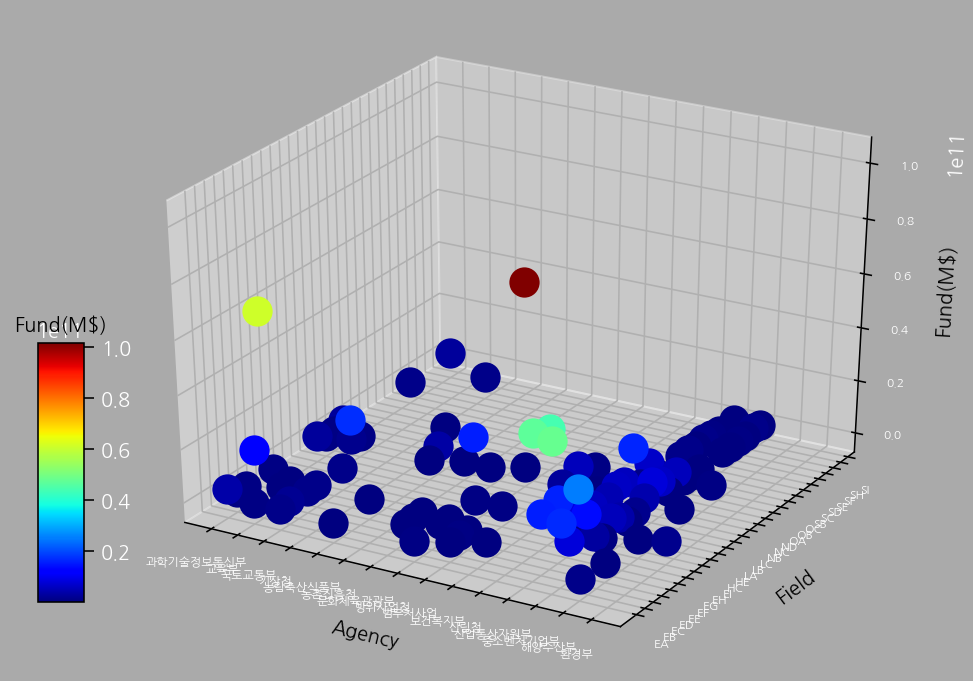

In [29]:
%matplotlib inline  
%config InlineBackend.figure_format = 'retina'
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm #한글 출력
import matplotlib

font8  = fm.FontProperties(fname = '/Library/Fonts/NanumGothic.otf', size=8)
print(font8.get_name())
matplotlib.rc('font', family=font8.get_name())

graph_3d_scatter(x,
                 y,
                 z, 
                 c= "#00ff00", 
                 s= 200, 
                 xlabel='Agency', 
                 ylabel='Field', 
                 zlabel='Fund(M$)',
                 nominalx=True,
                 nominaly=True,
                 #cmap='winter', # 
                 cmap = 'jet',
                 facecolor='#aaaaaa',
                )

## Example 

(0, 1)

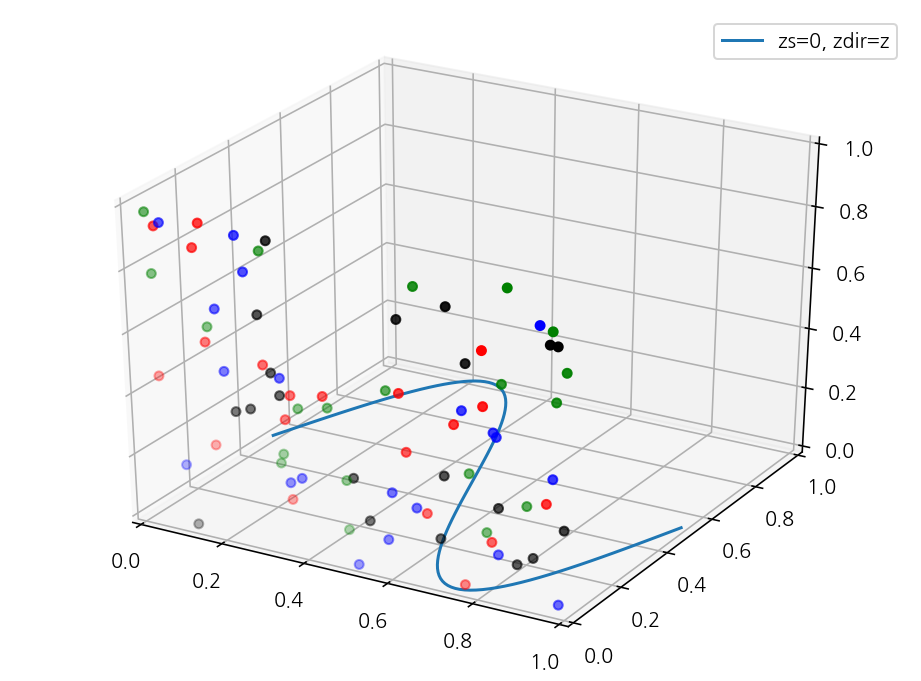

In [25]:
%matplotlib inline  
%config InlineBackend.figure_format = 'retina'

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')

x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x, y, zs=0, zdir='z', label='zs=0, zdir=z')

colors = ('r', 'g', 'b', 'k')
for c in colors:
    x = np.random.sample(20)
    y = np.random.sample(20)
    ax.scatter(x, y, 0, zdir='y', c=c)

ax.legend()
ax.set_xlim3d(0, 1)
ax.set_ylim3d(0, 1)
ax.set_zlim3d(0, 1)



## Example 3D

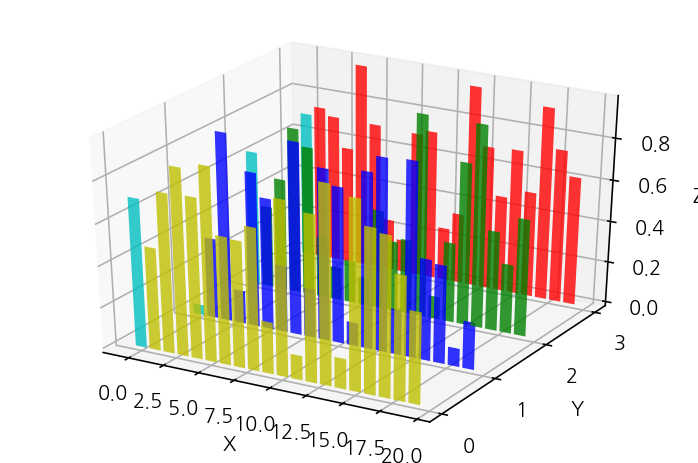

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y']
yticks = [3, 2, 1, 0]
for c, k in zip(colors, yticks):
    # Generate the random data for the y=k 'layer'.
    xs = np.arange(20)
    ys = np.random.rand(20)

    # You can provide either a single color or an array with the same length as
    # xs and ys. To demonstrate this, we color the first bar of each set cyan.
    cs = [c] * len(xs)
    cs[0] = 'c'

    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# On the y axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)

plt.show()